# Example: Tikhonov Regularization and model selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

from dskit.regression import TikhonovCV

%matplotlib inline

Read sample data

In [2]:
X = data.values
y = target.values[:, 0]

X_train, X_test, y_train, y_test = X[:125], X[125:], y[:125], y[125:]

## Training and test data

The sample data is described in detail in Brown, J. B. (1992), *Wavelength selection in multicomponent near‐infrared calibration*, J. Chemometrics, and contains NIR spectroscopy measurements of sugar samples across a range of 700 different wavelengths. 

* **Training data:**

The training data contains 125 measurements of three different sugars samples varying at five different levels.

* **Test data:**

The test data contains 25 measurements with compositions outside the range of the training data.

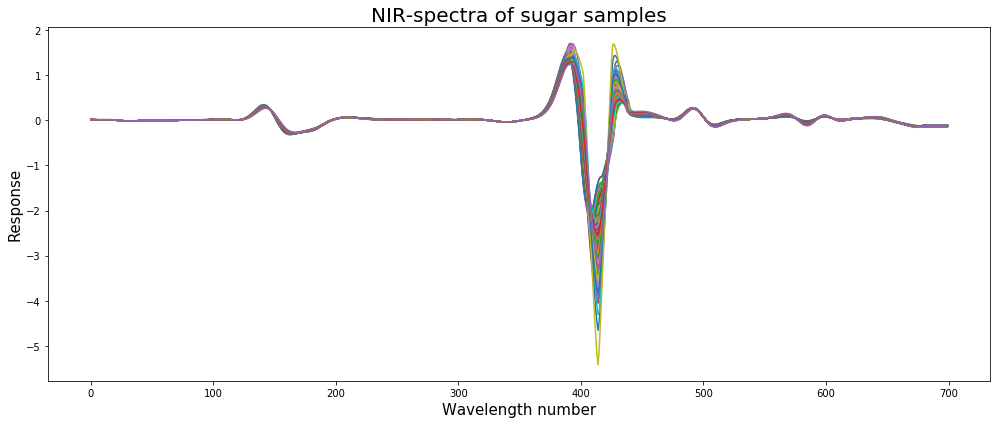

In [3]:
num_wavelengths = np.arange(X_train.shape[1])

plt.figure(figsize=(14, 6))
plt.plot(num_wavelengths, X_train.T)    
plt.title('NIR-spectra of sugar samples', fontsize=20)
plt.xlabel('Wavelength number', fontsize=15)
plt.ylabel('Response', fontsize=15)
plt.tight_layout()

## Grid search

Constructing regularization matrices

In [4]:
num_vars = X.shape[1]

regmat_base = np.eye(num_vars)
regmat_diff1 = np.diff(regmat_base, n=1).T
regmat_diff2 = np.diff(regmat_base, n=2).T

regmat_candidates = [regmat_base, regmat_diff1, regmat_diff2]

Specifying range of regularization parameter values

In [5]:
resolution = 25
alpha_candidates = np.logspace(-3, 3, resolution)

Construct parameter grid

In [6]:
param_grid = {
    'reg_mat': regmat_candidates,
    'alpha': alpha_candidates
}

Performing hyperparameter search

In [7]:
grid = GridSearchCV(estimator=TikhonovCV(reg_mat=regmat_base, alpha=1.0), 
                    cv=3, 
                    n_jobs=-1, 
                    param_grid=param_grid,  
                    scoring='r2')
grid.fit(X_train, y_train)

tikh = grid.best_estimator_

## Model comparison

Compare the performance of the regularized regression model with an unregularized regression model

In [8]:
tikh_score = cross_val_score(tikh, X_test, y_test, scoring='r2')
reg_score = cross_val_score(LinearRegression(), X_test, y_test, scoring='r2')

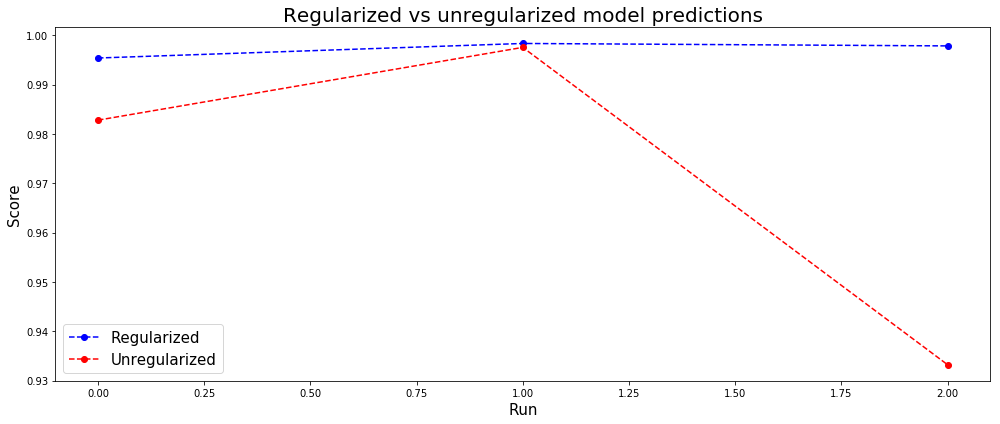

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(tikh_score.size), tikh_score, 'b--o')
plt.plot(np.arange(reg_score.size), reg_score, 'r--o') 
plt.title('Regularized vs unregularized model predictions', fontsize=20)
plt.xlabel('Run', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.legend(['Regularized', 'Unregularized'], fontsize=15, loc='best')
plt.tight_layout()